In [1]:
import pandas as pd
import numpy as np

pd.__version__

'2.0.3'

# Часть 2 - Структуры данных

## Series, DataFrame, Index

### Series

#### Конструктор

https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas-series

```python
Series(data=None, index=None, dtype=None, name=None, copy=None, fastpath=<no_default>)
```

In [9]:
pd.Series(1)

0    1
dtype: int64

In [8]:
pd.Series().index

RangeIndex(start=0, stop=0, step=1)

In [13]:
pd.Series(index=[1, 2, 3])

Series([], dtype: object)

In [18]:
pd.Series(index=pd.RangeIndex(1, 11, 1), dtype='float')

1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
dtype: float64

#### Атрибуты

https://pandas.pydata.org/docs/reference/series.html#attributes

- index
- array
- values
- dtype
- shape
- ndim
- size
- T
- memory_usage
- empty
- dtypes
- name

- at
- iat
- loc
- iloc
- axes
- is_monotonic_decreasing
- is_monotonic_increasing
- is_unique

In [26]:
ser2 = pd.Series(
    {'a': 1, 'b': 2}
)
ser2

a    1
b    2
dtype: int64

In [27]:
ser2.index

Index(['a', 'b'], dtype='object')

In [30]:
ser3 = pd.Series(
    {1: 1.5, 2: 2.5}
)
ser3.index, ser3

(Index([1, 2], dtype='int64'),
 1    1.5
 2    2.5
 dtype: float64)

In [33]:
pd.Series(['1', [2, 4], 3]).array

<PandasArray>
['1', [2, 4], 3]
Length: 3, dtype: object

In [34]:
ser3.values

array([1.5, 2.5])

In [37]:
ser3.dtype, ser3.dtypes

(dtype('float64'), dtype('float64'))

In [39]:
pd.Series(['1', [2, 4], 3]).dtypes

dtype('O')

In [44]:
ser3.shape

(2,)

In [45]:
ser3.size

2

In [46]:
ser3.T

1    1.5
2    2.5
dtype: float64

In [54]:
ser3.memory_usage()  # Ранее это был атрибут

32

In [55]:
ser3.empty

False

In [57]:
ser3.size

2

In [56]:
pd.Series().empty

True

In [58]:
pd.Series().size

0

In [61]:
pd.Series(index=[1, 2]).empty

1   NaN
2   NaN
dtype: float64

In [62]:
pd.Series(index=[1, 2]).size

2

In [5]:
ser4 = pd.Series(
    {'a': 1, 'b': 2}
)
ser4.axes

[Index(['a', 'b'], dtype='object')]

#### Задание 2.001

- Создать максимально разными способами несколько сериий
- Определить что серия пустая
- Сравнить длину двух любых серий

#### Преобразования

- .astype()
- .convert_dtypes()
- .infer_objects()
- .copy()
- .bool()
- .to_numpy()
- .to_period()
- .to_timestanp()
- .to_list()
- .\__array\__()

##### Series.astype()

```python
Series.astype(dtype, copy=None, errors='raise')
```

In [7]:
df5 = pd.DataFrame(
    {'a': [1, 2], 'b': [2, 3]}
)
df5.dtypes

a    int64
b    int64
dtype: object

In [8]:
df5.astype('int32').dtypes

a    int32
b    int32
dtype: object

In [9]:
df5.astype({'b': 'int32'}).dtypes

a    int64
b    int32
dtype: object

In [10]:
ser5 = pd.Series([1, 2, 3], dtype='int32')
ser5

0    1
1    2
2    3
dtype: int32

In [11]:
ser5.astype('category')

0    1
1    2
2    3
dtype: category
Categories (3, int32): [1, 2, 3]

In [12]:
from pandas.api.types import CategoricalDtype

cat_dtype = CategoricalDtype(
    categories=[3, 2], ordered=True
)

ser5.astype(cat_dtype)

0    NaN
1      2
2      3
dtype: category
Categories (2, int64): [3 < 2]

In [15]:
serdate = pd.Series(pd.date_range('20200101', periods=3))
serdate

0   2020-01-01
1   2020-01-02
2   2020-01-03
dtype: datetime64[ns]

##### Series.convert_dtypes()

```python
Series.convert_dtypes(
    infer_objects=True, 
    convert_string=True, 
    convert_integer=True, 
    convert_boolean=True, 
    convert_floating=True, 
    dtype_backend='numpy_nullable'
)
```

In [17]:
df6 = pd.DataFrame(
    {
        "a": pd.Series([1, 2, 3], dtype=np.dtype("int32")),
        "b": pd.Series(["x", "y", "z"], dtype=np.dtype("O")),
        "c": pd.Series([True, False, np.nan], dtype=np.dtype("O")),
        "d": pd.Series(["h", "i", np.nan], dtype=np.dtype("O")),
        "e": pd.Series([10, np.nan, 20], dtype=np.dtype("float")),
        "f": pd.Series([np.nan, 100.5, 200], dtype=np.dtype("float")),
    }
)
df6

,a,b,c,d,e,f
0,1,x,True,h,10.0,NaN
1,2,y,False,i,NaN,100.5
2,3,z,NaN,NaN,20.0,200.0


In [18]:
df6.dtypes

a      int32
b     object
c     object
d     object
e    float64
f    float64
dtype: object

In [19]:
dfn = df.convert_dtypes()
dfn

,a,b,c,d,e,f
0,1,x,True,h,10,<NA>
1,2,y,False,i,<NA>,100.5
2,3,z,<NA>,<NA>,20,200.0


In [20]:
dfn.dtypes

a             Int32
b    string[python]
c           boolean
d    string[python]
e             Int64
f           Float64
dtype: object

In [21]:
ser6 = pd.Series(['a', 'b', np.nan])
ser6

0      a
1      b
2    NaN
dtype: object

In [22]:
ser6.convert_dtypes()

0       a
1       b
2    <NA>
dtype: string

##### Series.infer_objects()

```python
Series.infer_objects(copy=None)
```

In [29]:
df7 = pd.DataFrame({'A': ['a', 1, 2, 3]})
df7

,A
0,a
1,1
2,2
3,3


In [30]:
df7 = df7.iloc[1:]
df7

,A
1,1
2,2
3,3


In [33]:
df7.dtypes

A    object
dtype: object

In [34]:
df7.infer_objects().dtypes

A    int64
dtype: object

##### Series.copy()

In [35]:
ser7 = ser6.copy()  # pd.Series(ser6)
ser7

0      a
1      b
2    NaN
dtype: object

##### Series.bool()

In [44]:
pd.Series([True]).bool(), pd.Series([False]).bool()

(True, False)

In [50]:
df8 = pd.DataFrame({'col': [True]})
df8

,col
0,True


In [52]:
df8.bool()

True

##### Задание 2.002

- .astype()
- .convert_dtypes()
- .infer_objects()
- .copy()
- .bool()

- Из датасета "data/part2/cat_food_orders.csv" создать серии из каждого столбца. Преобразовать серии с типом данных float64 - float32; int64 - int32. Преобразование выполнить несколькими способами:
    - вручную
    - автоматически

- Добавить в серию "wholesale_price" элемент типа "строка". Поисследовать возможность добавления такого элемента и преобразование типа данных серии вместе с этим элементом и без него (удалив его).

##### Series.to_numpy()

```python
Series.to_numpy(dtype=None, copy=False, na_value=<no_default>, **kwargs)
```

In [4]:
ser = pd.Series(pd.Categorical(['a', 'b', 'a']))
ser

0    a
1    b
2    a
dtype: category
Categories (2, object): ['a', 'b']

In [5]:
ser.to_numpy()

array(['a', 'b', 'a'], dtype=object)

In [8]:
ser = pd.Series(pd.date_range('2000', periods=2, tz='CET'))
ser

0   2000-01-01 00:00:00+01:00
1   2000-01-02 00:00:00+01:00
dtype: datetime64[ns, CET]

In [10]:
ser.to_numpy('datetime64[ns]')

array(['1999-12-31T23:00:00.000000000', '2000-01-01T23:00:00.000000000'],
      dtype='datetime64[ns]')

##### Series.to_period()

```python
Series.to_period(freq=None, copy=None)
```

In [12]:
idx = pd.DatetimeIndex(['2023', '2024', '2025'])
idx

DatetimeIndex(['2023-01-01', '2024-01-01', '2025-01-01'], dtype='datetime64[ns]', freq=None)

In [22]:
s = pd.Series([1, 2, 3], index=idx)
s

2023-01-01    1
2024-01-01    2
2025-01-01    3
dtype: int64

In [23]:
s.index

DatetimeIndex(['2023-01-01', '2024-01-01', '2025-01-01'], dtype='datetime64[ns]', freq=None)

In [24]:
s = s.to_period()
s

2023    1
2024    2
2025    3
Freq: A-DEC, dtype: int64

In [25]:
s.index

PeriodIndex(['2023', '2024', '2025'], dtype='period[A-DEC]')

##### Series.to_timestamp()

```python
Series.to_timestamp(freq=None, how='start', copy=None)
```

how: {'s', 'e', 'start', 'end'}

In [30]:
idx = pd.PeriodIndex(['2023', '2024', '2025'], freq='Y')
idx

PeriodIndex(['2023', '2024', '2025'], dtype='period[A-DEC]')

In [31]:
ser = pd.Series([1, 2, 3], idx)
ser

2023    1
2024    2
2025    3
Freq: A-DEC, dtype: int64

In [ ]:
ser = ser.to_timestamp()
ser

2023-01-01    1
2024-01-01    2
2025-01-01    3
Freq: AS-JAN, dtype: int64

In [34]:
ser2 = pd.Series([1, 2, 3], index=idx)
ser2

2023    1
2024    2
2025    3
Freq: A-DEC, dtype: int64

In [35]:
ser2 = ser2.to_timestamp(freq='M')
ser2

2023-01-31    1
2024-01-31    2
2025-01-31    3
Freq: A-JAN, dtype: int64

##### Series.to_list()

In [36]:
s = pd.Series([1, 2, 3])
s

0    1
1    2
2    3
dtype: int64

In [37]:
s.to_list()

[1, 2, 3]

In [38]:
list(s)

[1, 2, 3]

#### Индексация и итерация

- .get()
- .at
- .iat
- .loc
- .iloc
- .\__iter__()
- .items()
- .item()
- .keys()
- .pop()
- .xs()

##### Series.get()

```python
Series.get(key, default=None)
```

In [40]:
df = pd.DataFrame(
    [
        [24.3, 75.7, 'high'],
        [31, 87.8, 'high'],
        [22, 71.6, 'medium'],
        [35, 95, 'medium'],
    ],
    columns=['temp_celc', 'temp_faren', 'windspeed'],
    index=pd.date_range(start='2014-02-12', end='2014-02-15', freq='D')
)
df

,temp_celc,temp_faren,windspeed
2014-02-12,24.3,75.7,high
2014-02-13,31.0,87.8,high
2014-02-14,22.0,71.6,medium
2014-02-15,35.0,95.0,medium


In [44]:
df.get(['temp_celc', 'windspeed'])

,temp_celc,windspeed
2014-02-12,24.3,high
2014-02-13,31.0,high
2014-02-14,22.0,medium
2014-02-15,35.0,medium


In [45]:
df.get(['windspeed'])

,windspeed
2014-02-12,high
2014-02-13,high
2014-02-14,medium
2014-02-15,medium


In [51]:
df.get(['wind'], default='...')

'...'

##### Series.at

```python
Series.at[index]
DataFrame.at[row, column]
```

In [52]:
df = pd.DataFrame(
    [
        [0, 2, 3],
        [0, 4, 1],
        [10, 20, 30],
    ],
    index=[4, 5, 6],
    columns=['A', 'B', 'C']
)
df

,A,B,C
4,0,2,3
5,0,4,1
6,10,20,30


In [53]:
df.at[4, 'B']

2

In [55]:
df.at[4, 'B'] = 111
df

,A,B,C
4,0,111,3
5,0,4,1
6,10,20,30


In [58]:
df.B, df.B.at[5]

(4    111
 5      4
 6     20
 Name: B, dtype: int64,
 4)

##### Series.iat

```python
Series.iat[index]
DateFrame.iat[row_id, column_id]
```

In [59]:
df = pd.DataFrame(
    [
        [0, 2, 3],
        [0, 4, 1],
        [10, 20, 30],
    ],
    index=[4, 5, 6],
    columns=['A', 'B', 'C']
)
df

,A,B,C
4,0,2,3
5,0,4,1
6,10,20,30


In [60]:
df.iat[2, 2]

30

In [62]:
df.iat[2, 2] = 333
df

,A,B,C
4,0,2,3
5,0,4,1
6,10,20,333


In [63]:
df.C.iat[2]

333

##### Подробнее про атрибуты и срезы/индексы аттрибутов

In [64]:
df = pd.DataFrame(
    [
        [0, 2, 3],
        [0, 4, 1],
        [10, 20, 30],
    ],
    index=[4, 5, 6],
    columns=['A', 'B', 'C']
)
df

,A,B,C
4,0,2,3
5,0,4,1
6,10,20,30


In [76]:
df.T

,4,5,6
A,0,0,10
B,2,4,20
C,3,1,30


In [68]:
class my_class:
    def __init__(self, a, b):
        self.a = a
        self.b = b

my_object = my_class(1, 3)
my_object.a = 2
my_object.a

2

##### Задание 2.003

Дана серия данных о температуре в течение недели. Необходимо преобразовать эту серию в массив numpy и выполнить следующие операции с этим массивом:
- Найдите максимальную температуру
- Найдите минимальную температуру
- Вычислите среднюю температуру за неделю

```python
temperatures = pd.Series(
    [22, 24, 19, 23, 21, 25, 20], 
    index=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
)
```

##### Задание 2.004

Создайте серию данных, исходный вид которой показан ниже. Серия представляет количество проданных товаров по дням. 

Необходимо преобразовать эту серию в периоды (недели) и вывести общее количество продаж за каждую неделю.

Исходный вид серии:

```txt
2024-01-01     30
2024-01-02     25
2024-01-03     50
2024-01-04     45
2024-01-05     60
2024-01-06     75
2024-01-07     90
2024-01-08     55
2024-01-09     35
2024-01-10     40
2024-01-11     65
2024-01-12     70
2024-01-13     20
2024-01-14     85
2024-01-15     95
2024-01-16     80
2024-01-17    100
2024-01-18    110
2024-01-19     55
2024-01-20     35
Freq: D, dtype: int64
```

##### Задание 2.005

Создайте серию данных, исходный вид которой показан ниже. Серия представляет количество проданных товаров по месяцам. 

Необходимо преобразовать эту серию в временные метки (timestamp) и выполнить следующие операции:
- Выведите общие продажи за весь период.
- Выведите продажи за один любой месяц.

Исходный вид серии:

```txt
2024-01    500
2024-02    600
2024-03    450
2024-04    700
2024-05    800
Freq: M, dtype: int64
```

##### Задание 2.006

Создайте серию данных с оценками студентов, исходный вид которой показан ниже. 

Необходимо преобразовать эту серию в список и выполнить следующие операции:
- Найдите максимальную оценку.
- Найдите минимальную оценку.
- Вычислите среднюю оценку.
- Добавьте новую оценку в список.

Исходный вид серии:

```txt
Alice      85
Bob        90
Charlie    78
David      92
Eva        88
dtype: int64
```

##### Задание 2.007

Создайте серию данных с оценками студентов, исходный вид которой показан ниже. 

Необходимо:
- извлечь оценки для определенных студентов, используя метод get()
- обработать случаи, когда оценка отсутствует (например, 0, для студента Frank).

Исходный вид серии:

```txt
Alice      8.5
Bob        9.0
Charlie    7.8
David      9.2
Eva        8.8
dtype: float64
```

##### Задание 2.008

Ниже дана серия данных с оценками студентов. 

Необходимо использовать **Series.at** для доступа к оценкам отдельных студентов и изменения их значений.

Выполните следующие операции:
- Извлеките оценку Alice.
- Измените оценку Bob на 95.
- Извлеките изменённую оценку Bob.
- Добавьте оценку для нового студента Frank с помощью at.

```python
grades = pd.Series({'Alice': 85, 'Bob': 90, 'Charlie': 78, 'David': 92, 'Eva': 88})
```

##### Задание 2.009

Ниже дана серия данных с оценками студентов. 

Необходимо использовать метод **Series.iat** для доступа к оценкам **по их позиции** и изменения значений.

Выполните следующие операции:
- Извлеките оценку третьего студента (Charlie).
- Измените оценку второго студента (Bob) на 95.
- Извлеките изменённую оценку второго студента (Bob).
- Добавьте оценку для нового студента Frank в конец списка (например, 80) и подтвердите, что позиция учитывает порядок.

```python
grades = pd.Series([85, 90, 78, 92, 88], index=['Alice', 'Bob', 'Charlie', 'David', 'Eva'])
```

##### Series.loc

Варианты входных параметров:
- 4, 'a'
- ['a', 'b', 'c']
- 'a':'z'
- bool массив
- вызываемые функции

In [4]:
df = pd.DataFrame(
    [
        [1, 2],
        [4, 5],
        [7, 8]
    ],
    index=['кобра', 'кабанчик', 'медведь'],
    columns=['макс скорость', 'сила']
)
df

,макс скорость,сила
кобра,1,2
кабанчик,4,5
медведь,7,8


In [5]:
df.loc['кабанчик']

макс скорость    4
сила             5
Name: кабанчик, dtype: int64

In [ ]:
df.loc[['кабанчик', 'медведь']]

,макс скорость,сила
кабанчик,4,5
медведь,7,8


In [8]:
df.loc['кабанчик', 'сила']

5

In [10]:
df.loc['кабанчик':'медведь', 'макс скорость']

кабанчик    4
медведь     7
Name: макс скорость, dtype: int64

In [11]:
df.loc[[False, False, True]]

,макс скорость,сила
медведь,7,8


In [12]:
df['сила'] > 3

кобра       False
кабанчик     True
медведь      True
Name: сила, dtype: bool

In [13]:
df.loc[df['сила'] > 3]

,макс скорость,сила
кабанчик,4,5
медведь,7,8


In [14]:
df[df['сила'] > 3]

,макс скорость,сила
кабанчик,4,5
медведь,7,8


In [16]:
ser1 = pd.Series(
        [False, False, True],
        index=['кобра', 'кабанчик', 'медведь']
    )

In [17]:
df.loc[ser1]

,макс скорость,сила
медведь,7,8


In [21]:
df.loc[pd.Index(['кабанчик', 'медведь'], name='ololo')]

,макс скорость,сила
ololo,,
кабанчик,4,5
медведь,7,8


In [22]:
df.loc['кабанчик':'медведь', 'макс скорость':'сила']

,макс скорость,сила
кабанчик,4,5
медведь,7,8


In [23]:
df.loc[df['сила'] > 3, ['макс скорость']]

,макс скорость
кабанчик,4
медведь,7


In [26]:
df.loc[lambda df: df['сила'] == 5]

,макс скорость,сила
кабанчик,4,5


In [30]:
df.loc[['кабанчик', 'медведь'], ['сила']] = 50
df

,макс скорость,сила
кобра,1,2
кабанчик,4,50
медведь,7,50


In [33]:
df.loc['кобра'] = 11
df

,макс скорость,сила
кобра,11,11
кабанчик,4,50
медведь,7,50


In [35]:
df.loc[:, 'макс скорость'] = 33
df

,макс скорость,сила
кобра,33,11
кабанчик,33,50
медведь,33,50


In [ ]:
df.loc[df['сила'] >= 50] = -1
df

,макс скорость,сила
кобра,33,11
кабанчик,-1,-1
медведь,-1,-1


In [40]:
df.loc['кобра', 'макс скорость'] += 5
df

,макс скорость,сила
кобра,38,11
кабанчик,-1,-1
медведь,-1,-1


In [41]:
df.loc['кобра', 'макс скорость'] + 5

43

In [ ]:
df + 5

,макс скорость,сила
кобра,43,16
кабанчик,4,4
медведь,4,4


In [43]:
df

,макс скорость,сила
кобра,38,11
кабанчик,-1,-1
медведь,-1,-1


In [44]:
shuffled_df = df.loc[['кобра', 'кабанчик', 'медведь']]
shuffled_df

,макс скорость,сила
кобра,38,11
кабанчик,-1,-1
медведь,-1,-1


In [45]:
df.loc[:] += shuffled_df
df

,макс скорость,сила
кобра,76,22
кабанчик,-2,-2
медведь,-2,-2


In [54]:
df = pd.DataFrame([
    [1, 2],
    [4, 5],
    [7, 8]
    ],
    index=[7,8,9],
    columns=['макс скорость', 'сила']
)
df

,макс скорость,сила
7,1,2
8,4,5
9,7,8


In [56]:
df.loc[8:9]

,макс скорость,сила
8,4,5
9,7,8


##### Задание 2.010. Работа с методом `.loc`

В этом задании вам предстоит работать с методом `.loc`, используя различные техники фильтрации, извлечения и изменения данных в DataFrame и Series. В каждой задаче укажите, какой результат вы получили. Для этого вам понадобится создать DataFrame с данными о характеристиках животных.

1. Создайте DataFrame с характеристиками животных, используя следующие данные:
    - Данные:  
      ```
      [
          [10, 15],
          [25, 30],
          [40, 5],
          [35, 50],
          [20, 5]
      ]
      ```
    - Строки: `['лев', 'тигр', 'леопард', 'гиена', 'волк']`
    - Столбцы: `['скорость', 'сила']`

2. **Извлечение по индексу строки:**  
   Используя `.loc`, выведите данные для `'гиена'`.

3. **Извлечение нескольких строк:**  
   Извлеките строки для `'тигр'` и `'волк'`, применяя `.loc` с указанием списка индексов.

4. **Извлечение конкретной ячейки:**  
   Используя `.loc`, извлеките значение столбца `'сила'` для `'леопард'`.

5. **Срез строк и столбцов:**  
   Используйте `.loc` для извлечения данных о скорости для животных от `'лев'` до `'леопард'` (включительно).

6. **Фильтрация с использованием булевого массива:**  
   Создайте булев массив, который отмечает строки, где `сила > 10`, и примените его для извлечения строк из DataFrame.

7. **Фильтрация на основе Series:**  
   Создайте Series с булевыми значениями, отмечая True для `'лев'` и `'леопард'`, и используйте `.loc` для извлечения данных по этому критерию.

8. **Замена значений в строках:**  
   Установите значение `сила = 60` для строк с индексами `'тигр'` и `'гиена'`.

9. **Замена всех значений строки:**  
   Используя `.loc`, замените значения строки `'волк'` на `[45, 25]`.

10. **Изменение значений столбца:**  
    Установите скорость всех животных на 50.

11. **Применение условий для замены значений:**  
    Замените значения всех строк, где `сила >= 60`, на `-1`.

12. **Увеличение значения в ячейке:**  
    Увеличьте значение `'скорость'` для `'лев'` на 10 с помощью `.loc`.

13. **Выполнение вычислений для всех значений DataFrame:**  
    Прибавьте 5 ко всем значениям в DataFrame.

14. **Сравнение с перемешанным DataFrame:**  
    Создайте перемешанный DataFrame с животными в порядке `'гиена', 'лев', 'тигр', 'волк', 'леопард'` и прибавьте его значения к DataFrame (обратите внимание на правильное использование индексов).

15. **Фильтрация с помощью lambda:**  
    Используйте `.loc` и `lambda`, чтобы отфильтровать строки, где `скорость` равна 50.

16. **Создание нового DataFrame с числовыми индексами**  
    Создайте новый DataFrame с теми же данными, но с числовыми индексами от 5 до 9. Используйте `.loc`, чтобы извлечь строки с индексами от 6 до 8 включительно.

17. **Анализ вариантов применения .loc:**  
    Для каждого задания напишите типы данных, которые принимает `.loc` (строки, списки, срезы, булевые массивы и Series и т.п.). Создайте DataFrame с номерами заданий и типами данных, которые вы передали `.loc`. 
    
    Пример таблицы:
    - 2: int
    - 3: [int:int]
    - 4: [[str:str], [bool]]
    - и т.п.

    >ВАЖНО: в таблицу записывайте только те задания в которых использовался `.loc`
    
    На основе полученной таблицы выведите все уникальные варианты типов данных, которые вы использовали в решиии всех заданий.


##### Получение значений с мультииндексами

In [44]:
tuples = [
    ('кобра', 'тип 1'), ('кобра', 'тип 2'),
    ('кабанчик', 'тип 1'), ('кабанчик', 'тип 2'),
    ('медведь', 'тип 2'), ('медведь', 'тип 3')
]

index = pd.MultiIndex.from_tuples(tuples)

values = [
    [12, 2], [0, 4], [10, 20],
    [1, 4], [7, 1], [16, 36]
]

df = pd.DataFrame(
    values, 
    columns=['макс скорость', 'сила'],
    index=index
)

df

макс скорость  сила
кобра    тип 1             12     2
         тип 2              0     4
кабанчик тип 1             10    20
         тип 2              1     4
медведь  тип 2              7     1
         тип 3             16    36

In [3]:
df.loc['кобра']

,макс скорость,сила
тип 1,12,2
тип 2,0,4


In [4]:
df.loc['кобра', 'тип 2']

/tmp/ipykernel_16689/4143634316.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  df.loc['кобра', 'тип 2']


,,макс скорость,сила
кобра,тип 2,0,4


In [8]:
df.loc[[('кобра', 'тип 2'), ('кабанчик', 'тип 2')]]

,,макс скорость,сила
кобра,тип 2,0,4
кабанчик,тип 2,1,4


In [19]:
df.loc[('кобра', 'тип 2'), 'сила']

4

In [12]:
# df.loc[('кобра', 'тип 1'):'медведь'] Error

In [17]:
# df.loc[('кобра', 'тип 1'):('кабанчик', 'тип 1')] Error

##### Series.iloc (УСТАРЕЛО)

##### Series.\__iter__()

In [20]:
s = pd.Series([1, 2, 3])
s

0    1
1    2
2    3
dtype: int64

In [21]:
for item in s:
    print(item)

1
2
3


##### Series.item() и Series.items() 

In [ ]:
s = pd.Series([1])
s

0    1
dtype: int64

In [27]:
s.item()

1

In [28]:
s = pd.Series([1], index=['aa'])
s

aa    1
dtype: int64

In [29]:
s.item()

1

In [31]:
s.index.item()

'aa'

In [32]:
s = pd.Series([1, 2, 3])
s

0    1
1    2
2    3
dtype: int64

In [36]:
tuple(s.items())[1]

(1, 2)

##### Series.keys()

In [37]:
s = pd.Series([1, 2, 3], index=[0, 1, 2])
s

0    1
1    2
2    3
dtype: int64

In [40]:
s.keys()  # s.index

Index([0, 1, 2], dtype='int64')

##### Series.pop()

```python
Series.pop(item)
```

In [41]:
s = pd.Series([1, 2, 3], index=[0, 1, 2])
s

0    1
1    2
2    3
dtype: int64

In [42]:
s.pop(0)

1

In [43]:
s

1    2
2    3
dtype: int64

##### Series.xs()

```python
Series.xs(key, axis=0, level=None, drop_level=True)
```

In [ ]:
tuples = [
    ('кобра', 'тип 1'), ('кобра', 'тип 2'),
    ('кабанчик', 'тип 1'), ('кабанчик', 'тип 2'),
    ('медведь', 'тип 2'), ('медведь', 'тип 3')
]

index = pd.MultiIndex.from_tuples(tuples)

values = [
    [12, 2], [0, 4], [10, 20],
    [1, 4], [7, 1], [16, 36]
]

df = pd.DataFrame(
    values, 
    columns=['макс скорость', 'сила'],
    index=index
)

df

макс скорость  сила
кобра    тип 1             12     2
         тип 2              0     4
кабанчик тип 1             10    20
         тип 2              1     4
медведь  тип 2              7     1
         тип 3             16    36

In [45]:
df.xs('кабанчик')

,макс скорость,сила
тип 1,10,20
тип 2,1,4


In [50]:
df.xs(key=('кабанчик', 'тип 2'))

макс скорость    1
сила             4
Name: (кабанчик, тип 2), dtype: int64

In [54]:
tuples = [
    ('кобра', 'тип 1'), 
    ('кобра', 'тип 2'),
    ('кабанчик', 'тип 1'),
    ('кабанчик', 'тип 2')
]

index = pd.MultiIndex.from_tuples(tuples)

s = pd.Series([1, 2, 3, 4], index=index)
s

кобра     тип 1    1
          тип 2    2
кабанчик  тип 1    3
          тип 2    4
dtype: int64

In [56]:
s.xs(('кабанчик', 'тип 2'))

4

##### Задание 2.011

Создать датафрейм с данными по автомобилями с мультииндексами.

Применить различными способами к датафрейму .loc и .xs() для получения данных.

#### Функции бинарных операторов

Какие из перечисленных ниже операторов по вашему мнению бинарные, а какие нет и почему?

```python
del a['r']
True or True
1 and 1
not 222
'a' is str
+
-
&
*
**
```

Функции бинарных операторов которые мы рассмотрим приведены в таблице ниже:

|	Функция	|	Описание	|
|	---	    |	---	        |
|	Series.add(other[, level, fill_value, axis])	|	Сложение рядов и скаляра поэлементно (бинарный оператор add )	|
|	Series.sub(other[, level, fill_value, axis])	|	Вычитание рядов и скаляра поэлементно (бинарный оператор sub )	|
|	Series.mul(other[, level, fill_value, axis])	|	Умножение рядов и скаляра поэлементно (бинарный оператор mul )	|
|	Series.div(other[, level, fill_value, axis])	|	Деление рядов и скаляра поэлементно (бинарный оператор truediv )	|
|	Series.mod(other[, level, fill_value, axis])	|	Остаток от деления ряда и скаляра поэлементно (бинарный оператор mod )	|
|	Series.pow(other[, level, fill_value, axis])	|	Возведение в степень ряда и скаляра поэлементно (бинарный оператор pow )	|
|	---	    |	---	        |
|	Series.lt(other[, level, fill_value, axis])	    |	«Меньше, чем» для ряда и скаляра поэлементно (бинарный оператор lt )	|
|	Series.gt(other[, level, fill_value, axis])	    |	«Больше, чем» для ряда и скаляра поэлементно (бинарный оператор gt )	|
|	Series.le(other[, level, fill_value, axis])	    |	«Меньше или равно» ряда и скаляра поэлементно (бинарный оператор le )	|
|	Series.ge(other[, level, fill_value, axis])	    |	«Больше или равно» ряда и скаляра поэлементно (бинарный оператор ge )	|
|	Series.ne(other[, level, fill_value, axis])	    |	«Не равно» для ряда и скаляра, поэлементно (бинарный оператор ne )	|
|	Series.eq(other[, level, fill_value, axis])	    |	«Равенство» рядам и скалярам элементам (бинарный оператор eq )	|
|	---	    |	---	        |
|	Series.combine(other, func[, fill_value])	    |	Объединение ряда с рядом или скаляром в соответствии с функцией 	|
|	Series.round([decimals])	                    |	Округление каждого значения в ряду до указанного количества знаков после запятой	|

##### Series.add()

In [ ]:
Series.add(
    other[
        ,
        level,
        fill_value,
        axis
    ]
)

In [5]:
df = pd.DataFrame(
    [
        [1, 2],
        [4, 5],
        [7, 8]
    ],
    index=['кобра', 'кабанчик', 'медведь'],
    columns=['макс скорость', 'сила']
)
df

,макс скорость,сила
кобра,1,2
кабанчик,4,5
медведь,7,8


In [6]:
df['сила'] + 100

кобра       102
кабанчик    105
медведь     108
Name: сила, dtype: int64

In [7]:
df['сила'].add(200)

кобра       202
кабанчик    205
медведь     208
Name: сила, dtype: int64

In [8]:
df['сила'].add(df['макс скорость'])

кобра        3
кабанчик     9
медведь     15
dtype: int64

##### Series.combine()

```python
Series.combine(other, func[, fill_value])
```

In [9]:
s1 = pd.Series({'ястреб': 100, 'утка': 50, 'ворона': 70})
s1

ястреб    100
утка       50
ворона     70
dtype: int64

In [18]:
s1.combine(60, min)

ястреб    60
утка      50
ворона    60
dtype: int64

In [19]:
s2 = pd.Series({'ястреб': 1, 'утка': 5, 'ворона': 7})
s2

ястреб    1
утка      5
ворона    7
dtype: int64

In [ ]:
s1.combine(s2, min)

ястреб    100
утка       50
ворона     70
dtype: int64

##### Задание 2.012

Применяя метод .combine вернуть последовательность в которой будут только чётные числа или NaN. 

Если оба числа чётные вернуть первое чётное число. Если оба числа нечётные вернуть NaN

Пример:
- 3 и 4 = 4
- 3 и 3 = NaN
- 4 и 7 = 4
- 4 и 2 = 4

#### Функции применения, группировки и окон

```python
Series.apply(func[, convert_dtype, args, by_row, kwargs])
Series.agg([func, axis])
Series.aggregate([func, axis])
Series.transform(func[, axis])
Series.map(arg[, na_action])
Series.groupby([by, axis, level, as_index, ...])
Series.rolling(window[, min_periods, ...])
Series.expanding([min_periods, axis, method])
Series.ewm([com, span, halflife, alpha, ...])
Series.pipe(func, *args, **kwargs)
```

##### Series.apply()

In [2]:
s = pd.Series([10, 20, 30])
s

0    10
1    20
2    30
dtype: int64

In [3]:
s.apply('max')

30

In [ ]:
def pow_2(x):
    return x ** 2

In [8]:
s.apply(pow_2)

0    100
1    400
2    900
dtype: int64

In [11]:
s.apply(lambda x: x ** 3)

0     1000
1     8000
2    27000
dtype: int64

In [ ]:
def my_pow(x, y):
    return x ** y

In [ ]:
s.apply(my_pow, args=(2, ))

0    100
1    400
2    900
dtype: int64

In [22]:
s

0    10
1    20
2    30
dtype: int64

In [20]:
def percents(number, **kwargs):
    for percent in kwargs:
        number *= kwargs[percent]
    return number

In [21]:
s.apply(percents, mon=0.1, tue=0.2, wed=0.3)

0    0.06
1    0.12
2    0.18
dtype: float64

In [23]:
10 * 0.1 * 0.2 * 0.3

0.06

##### Series.agg()

Series.agg([func, axis, args, kwargs])

In [24]:
s = pd.Series([90, 80, 70, 60])
s

0    90
1    80
2    70
3    60
dtype: int64

In [26]:
s.agg(max)

90

In [29]:
s.agg([min, max, sum])

min     60
max     90
sum    300
dtype: int64

In [30]:
def pow_2(x):
    return x ** 2

In [33]:
def pow_3(x):
    return x ** 3

In [31]:
s.agg(pow_2)

0    8100
1    6400
2    4900
3    3600
dtype: int64

In [34]:
s.agg([pow_2, pow_3])

,pow_2,pow_3
0,8100,729000
1,6400,512000
2,4900,343000
3,3600,216000


Series.aggregate([func, axis]) - алиас Series.agg

##### Series.transform()

Series.transform(func[, axis, args, kwargs])

In [39]:
df = pd.DataFrame({'Mon': [1, 2, 3], 'Tue': [2, 3, 4], 'Name': ['n', 'm', 'b']})
df

,Mon,Tue,Name
0,1,2,n
1,2,3,m
2,3,4,b


In [42]:
df.drop('Name', axis=1).transform(lambda x: x ** 2)

,Mon,Tue
0,1,4
1,4,9
2,9,16


In [43]:
s = pd.Series([19, 20, 21])
s

0    19
1    20
2    21
dtype: int64

In [45]:
s.transform([np.exp, np.sqrt])

,exp,sqrt
0,1.784823e+08,4.358899
1,4.851652e+08,4.472136
2,1.318816e+09,4.582576


In [46]:
df.drop('Name', axis=1).transform([np.exp, np.sqrt])

Mon                  Tue          
         exp      sqrt        exp      sqrt
0   2.718282  1.000000   7.389056  1.414214
1   7.389056  1.414214  20.085537  1.732051
2  20.085537  1.732051  54.598150  2.000000

##### Задание 2.013

Исследовать датасет из файла data/part2/noisy_series.csv применяя три метода:
- .apply()
- .agg()
- .transform()

Каждый из трёх методов необходимо применить для 5ти разных функций: 
1. обрабатывающих всю серию целиком
2. обрабатывающих серию поэлементно

В 1. и 2. минимум одна из 5ти должна быть собственная функция.


##### Series.map()

```python
Series.map(arg[, na_action])
```

In [3]:
# map in python 
result = map(str, [1, 2, 3])
list(result)

['1', '2', '3']

In [7]:
s = pd.Series(['ann', 'pet', 'cat', np.nan, 'den'])
s

0    ann
1    pet
2    cat
3    NaN
4    den
dtype: object

In [8]:
s.map({'ann': 'ANN', 'pet': 'Pet'})

0    ANN
1    Pet
2    NaN
3    NaN
4    NaN
dtype: object

In [11]:
s.map('I am a {}'.format)

0    I am a ann
1    I am a pet
2    I am a cat
3    I am a nan
4    I am a den
dtype: object

In [12]:
s.map('I am a {}'.format, na_action='ignore')

0    I am a ann
1    I am a pet
2    I am a cat
3           NaN
4    I am a den
dtype: object

##### Series.groupby()

```python
Series.groupby(
    by=None, 
    axis=0, # Устарело с версии 2.1.0 Вместо него использовать: ser.T.groupby()
    level=None, 
    as_index=True, 
    sort=True, 
    group_keys=True, 
    observed=<no_default>, 
    dropna=True
)

Series.groupby([by, axis, level, as_index, ...])
```

In [16]:
ser = pd.Series(
    [100., 200., 300., 400.],
    index=['ann', 'den', 'pet', 'cat'],
    name='Salary'
)
ser

ann    100.0
den    200.0
pet    300.0
cat    400.0
Name: Salary, dtype: float64

In [24]:
ser.groupby(['a', 'b', 'a', 'b']).max()

a    300.0
b    400.0
Name: Salary, dtype: float64

In [32]:
arr = [
    ['ann', 'den', 'ann', 'cat'],
    ['otd 1', 'otd 2', 'otd 1', 'otd 2']
]

index = pd.MultiIndex.from_arrays(arr, names=('Name', 'Otd'))

ser = pd.Series([100., 200., 300., 400.], index=index, name='Salary')
ser

Name  Otd  
ann   otd 1    100.0
den   otd 2    200.0
ann   otd 1    300.0
cat   otd 2    400.0
Name: Salary, dtype: float64

In [34]:
ser.groupby(level=0).mean()

Name
ann    200.0
cat    400.0
den    200.0
Name: Salary, dtype: float64

In [36]:
ser.groupby(level='Otd').min()

Otd
otd 1    100.0
otd 2    200.0
Name: Salary, dtype: float64

In [37]:
ser = pd.Series([1, 2, 3, 3], index=['a', 'a', 'b', np.nan])
ser

a      1
a      2
b      3
NaN    3
dtype: int64

In [41]:
ser.groupby(level=0, dropna=False).sum()

a      3
b      3
NaN    3
dtype: int64

In [42]:
arr = ['ann', 'den', 'ann', 'cat']
ser = pd.Series([100., 200., 300., 400.], index=arr, name='Salary')
ser

ann    100.0
den    200.0
ann    300.0
cat    400.0
Name: Salary, dtype: float64

In [46]:
ser.groupby(['a', 'b', 'a', np.nan]).mean()

a    200.0
b    200.0
Name: Salary, dtype: float64

In [44]:
ser.groupby(['a', 'b', 'a', np.nan], dropna=False).mean()

a      200.0
b      200.0
NaN    400.0
Name: Salary, dtype: float64

##### Задание 2.014

Заргузите датасет "data/student-por.csv" в dataframe.

Необходимо исследовать датасет выполнив следующие задания:

1. Создать серию с мультииндексами 
    - в качестве значений взять столбец G3 (оценка по третьему учебному предмету)
    - в качестве мультииндексов взять столбцы 'school', 'sex', 'age'
2. C помощью map:
    - Заменить оценки с значением 0 баллов на значение NaN 
3. С помощью groupby:
    - Вывести медиану оценок по следующим группам:
        - по школе
        - по полу
        - по возрасту
    - Вывести среднюю оценку сгрупировав в две ргуппы: до 18 лет (включительно) и старше 18 лет.
    - Применить остальные ключи (as_index, sort, group_keys, observed, dropna) к серии. При необходимости можно изменить серию чтобы увидеть эффект от применения конкретных ключей.

##### Series.rolling()

```python
Series.rolling(
    window, 
    min_periods=None, 
    center=False, 
    win_type=None, 
    on=None, 
    axis=<no_default>, 
    closed=None, 
    step=None, 
    method='single'
)
```

In [3]:
df = pd.DataFrame({'v': [1, 2, 3, np.nan, 4]})
df

,v
0,1.0
1,2.0
2,3.0
3,NaN
4,4.0


In [5]:
df.rolling(3).sum()

,v
0,NaN
1,NaN
2,6.0
3,NaN
4,NaN


##### Series.expanding()

```python
Series.expanding(min_periods=1, axis=<no_default>, method='single')
```

In [8]:
df = pd.DataFrame({'v': [1, 2, 3, np.nan, np.nan, 5]})
df

,v
0,1.0
1,2.0
2,3.0
3,NaN
4,NaN
5,5.0


In [10]:
df.expanding(3).sum()

,v
0,NaN
1,NaN
2,6.0
3,6.0
4,6.0
5,11.0


##### Series.ewm()

```python
Series.ewm(
    com=None, 
    span=None, 
    halflife=None, 
    alpha=None, 
    min_periods=0, 
    adjust=True, 
    ignore_na=False, 
    axis=<no_default>, 
    times=None, 
    method='single'
)
```

In [11]:
df = pd.DataFrame({'v': [1, 2, 3, np.nan, np.nan, 5]})
df

,v
0,1.0
1,2.0
2,3.0
3,NaN
4,NaN
5,5.0


In [12]:
df.ewm(com=0.5).mean()

,v
0,1.000000
1,1.750000
2,2.615385
3,2.615385
4,2.615385
5,4.878906


##### Series.pipe()

```python
Series.pipe(func, *args, **kwargs)
```

In [13]:
data = [
    [80, 100],
    [96, np.nan],
    [50, 20],
]

df = pd.DataFrame(data, columns=['temp', 'hum'])
df

,temp,hum
0,80,100.0
1,96,NaN
2,50,20.0


In [14]:
def procent_85(df):
    return df * 0.85

def plus_5(df, value):
    return df + 5 * value

def sqrt(df, value, pow):
    return df ** 0.5 + value ** pow

In [ ]:
sqrt(
    plus_5(
        procent_85(df), 10
    ),
    11,
    2
)

,temp,hum
0,131.862780,132.618950
1,132.471704,NaN
2,130.617692,129.185353


In [17]:
(
    df.pipe(procent_85)
    .pipe(plus_5, 10)
    .pipe(sqrt, 11, 2)
)

,temp,hum
0,131.862780,132.618950
1,132.471704,NaN
2,130.617692,129.185353


##### Задание 2.015

Используйте метод **rolling()** для вычисления скользящей суммы и среднего на последовательности чисел. 

Для этого выполните следующие шаги:
1. Создайте серию, содержащую числа от 1 до 10 включительно.
2. Примените метод rolling() для вычисления суммы и среднего значений на скользящем окне размером 3.
3. Выведите результат для каждого из этих вычислений (сумма и среднее).
4. Ответьте на вопросы:
    - Что происходит с результатами в п.2? Почему?
    - Измените размер окна с 3 на 4 и повторите вычисления. Как изменится результат? Почему?
5. Постройте график для вычисленных суммы и среднего значений на скользящем окне размером от 2 до 7 (включительно) с шагом 1. Результат должен выглядеть как на изображении ниже.
6. Ответьте на вопросы:
    - Что происходит с результатами в п.5? Почему?

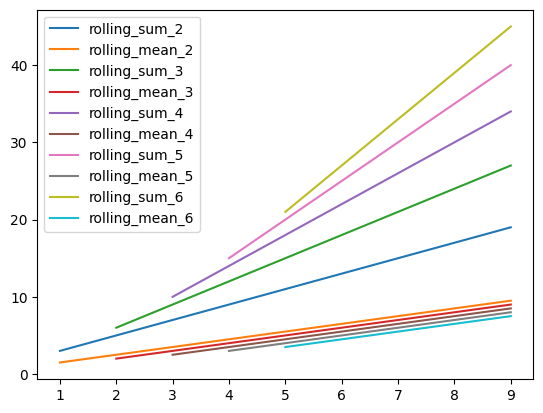

##### Задание 2.016

Используйте метод **expanding()** для вычисления скользящей суммы и среднего на последовательности чисел. 

Для этого выполните следующие шаги:
1. Создайте серию, содержащую числа от 1 до 10 включительно.
2. Примените метод expanding() для вычисления суммы и среднего значений.
3. Выведите результат для каждого из этих вычислений (сумма и среднее).
4. Постройте график для вычисленных суммы и среднего значений. Результат должен выглядеть как на изображении ниже.
5. Ответьте на вопросы:
    - Что происходит с результатами в п.3 и п.4? Почему?
    - Измените размер окна с 3 на 4 и повторите вычисления. Как изменится результат? Почему?

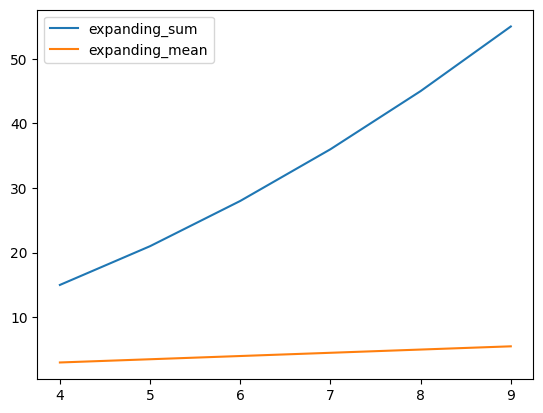

##### Задание 2.017

Придумайте и выполните задание по применению метода rolling на нечисловой серии.

##### Задание 2.018

Вы работаете в компании, которая анализирует данные о продажах. 

У вас есть данные о продажах продуктов в разных магазинах. Ваша задача — обработать их и провести несколько операций:
1. Применить скидку 10% ко всем продажам.
2. Отсортировать данные по убыванию количества проданных единиц.
3. Оставить только те товары, которые продались более чем 50 раз.
4. Рассчитать среднюю цену для оставшихся товаров.

Данные о продажах (Датафрейм):
- product: apple, banana, orange, pear, grape,
- sales: 100, 200, 50, 150, 80,
- price: 1.0, 0.5, 0.75, 1.2, 2.0

# MultiIndex, Categorical, Scalar